In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns
import os

In [2]:
# Checking Version
print(f"Tensorflow Version {tf.__version__}")
print(f"Keras Version {tf.keras.__version__}")


Tensorflow Version 2.17.0
Keras Version 3.4.1


In [3]:
os.getcwd()

'C:\\Users\\udayr\\OneDrive\\Desktop\\ML\\Deep Learning'

### GPU / CPU Check

In [4]:
tf.config.list_physical_devices("GPU")

[]

In [5]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [6]:
check_list = ['GPU',"CPU"]

for device in check_list:
    out = tf.config.list_physical_devices(device)
    if len(out) > 0:
        print(f"{device} is available!")
        print(f"Details >> {out}")
    else:
        print(f"{device} isn't available!")

GPU isn't available!
CPU is available!
Details >> [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


### Creating a simple classifier using keras on MNIST data

In [7]:
mnist = tf.keras.datasets.mnist

In [8]:
mnist

<module 'keras.api.datasets.mnist' from 'C:\\Users\\udayr\\anaconda3\\Lib\\site-packages\\keras\\api\\datasets\\mnist\\__init__.py'>

In [9]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [10]:
X_train_full.shape

(60000, 28, 28)

In [11]:
X_test.shape

(10000, 28, 28)

In [12]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [13]:
print(f"data type of X_Train_full: {X_train_full.dtype},\n shape of X_train_full: {X_train_full.shape}")

data type of X_Train_full: uint8,
 shape of X_train_full: (60000, 28, 28)


In [14]:
X_test.shape

(10000, 28, 28)

In [15]:
# create a validation data set from the full training data
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data btw 0-255 range
X_valid , X_train = X_train_full[:5000]/255. , X_train_full[5000:]/255.
y_valid , y_train = y_train_full[:5000] , y_train_full[5000:]

#scale the test set as well
X_test = X_test / 255.

In [16]:
# Train - 55000
# Test - 10000
# Val - 5000

In [17]:
len(X_train_full[5000:])

55000

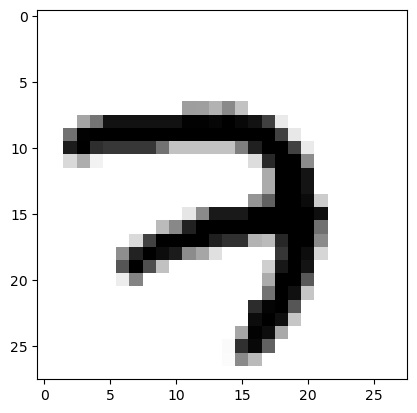

In [18]:
# Lets View some data

plt.imshow(X_train[0], cmap="binary")
plt.show()

<Axes: >

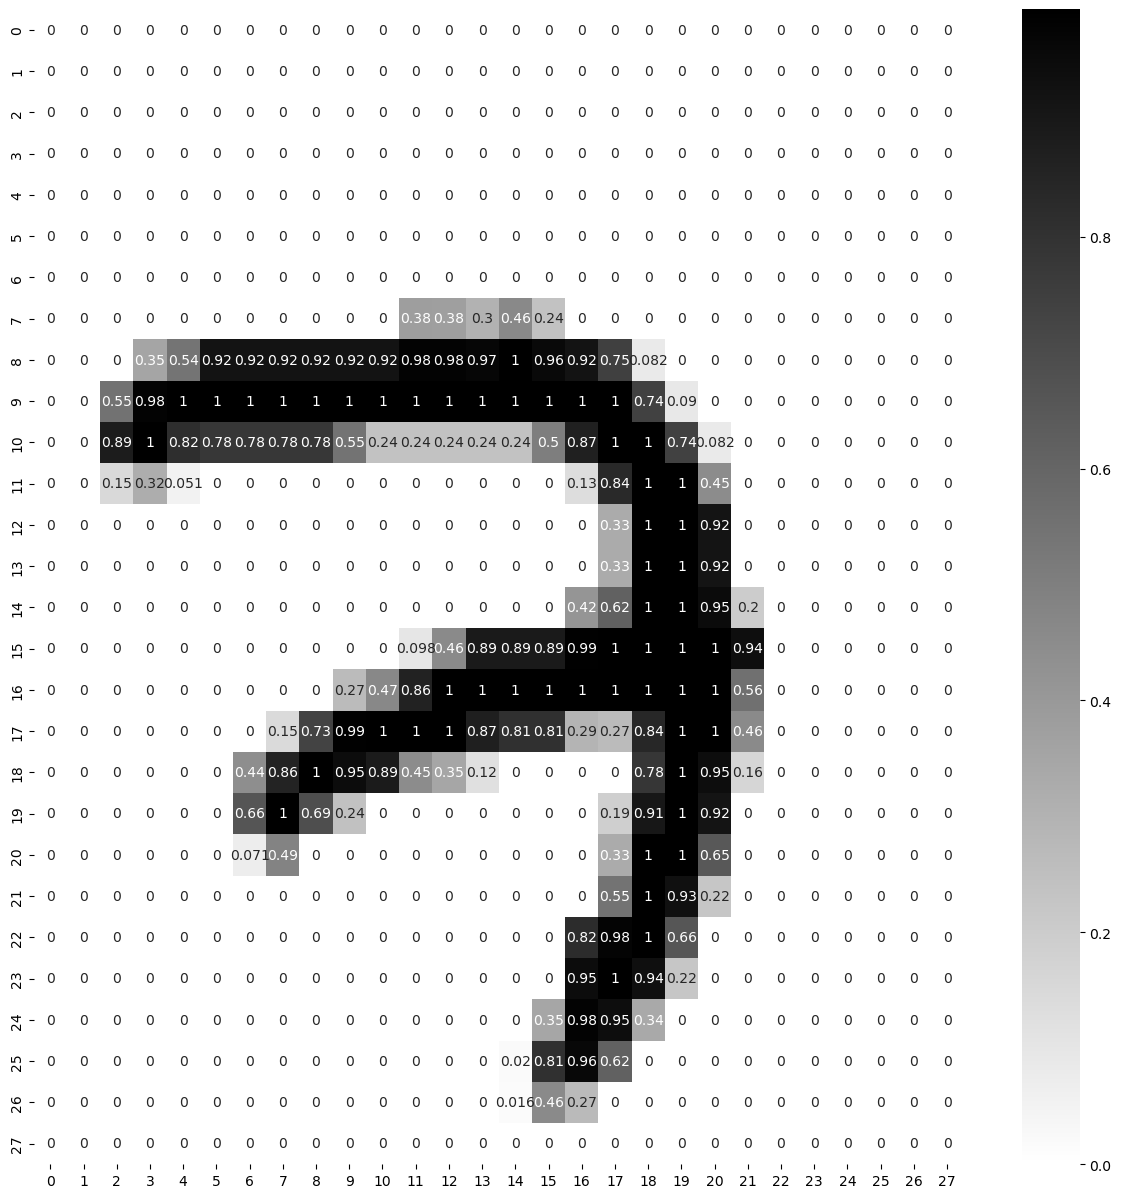

In [19]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True , cmap='binary')

In [20]:
# Creating layers of ANN   || Method - 1
LAYERS = [
    tf.keras.layers.Flatten(input_shape=[28,28], name='inputLayer')
    ,tf.keras.layers.Dense(300, activation='relu', name="HiddenLayer1"),
    tf.keras.layers.Dense(100, activation='relu',name="HiddenLayer2"),
    tf.keras.layers.Dense(10, activation='softmax',name="outputLayer")
]

model_clf = tf.keras.models.Sequential(LAYERS)

C:\Users\udayr\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
# Method - 2
#from keras.models import Sequential
#from keras.layers import Dense, Flatten

#define the model
#model = Sequential()
#model.add(Dense(units=64,activation='relu',input_dim = 100))
#model.add(Dense(units=10,activation='softmax'))

# compile the model
#model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

#train the model
#model.fit(X_train, y_train , epochs=5 , batch_size = 32)

In [22]:
model_clf.layers

[<Flatten name=inputLayer, built=True>,
 <Dense name=HiddenLayer1, built=True>,
 <Dense name=HiddenLayer2, built=True>,
 <Dense name=outputLayer, built=True>]

In [23]:
model_clf.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inputLayer (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ HiddenLayer1 (Dense)                 │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ HiddenLayer2 (Dense)                 │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ outputLayer (Dense)                  │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
 # first layer + secondlayer + bias
784*300 + 300 , 300*100+100 ,100*10+10

(235500, 30100, 1010)

In [25]:
hidden1 = model_clf.layers[1]
hidden1.name

'HiddenLayer1'

In [26]:
len(hidden1.get_weights())

2

In [27]:
hidden1.get_weights()

[array([[-0.00205191, -0.04494428,  0.07424656, ...,  0.0443185 ,
          0.04981914, -0.02558057],
        [-0.01382745, -0.04303255,  0.01532222, ...,  0.07404436,
         -0.02762167, -0.01384347],
        [ 0.02277666,  0.0445969 ,  0.04643006, ...,  0.00259684,
          0.01070192, -0.07360861],
        ...,
        [ 0.0396757 ,  0.00579414,  0.01158218, ...,  0.01996247,
         -0.02262523, -0.0625182 ],
        [-0.07007422,  0.07399456, -0.00312112, ...,  0.04401721,
         -0.05531832,  0.04878855],
        [-0.04081718,  0.07008277,  0.0524182 , ...,  0.05487323,
         -0.04586333,  0.04859108]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [28]:
weights, biases = hidden1.get_weights()

In [29]:
weights.shape

(784, 300)

In [30]:
LOSS_FUNCTION = 'sparse_categorical_crossentropy'
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model_clf.compile(loss = LOSS_FUNCTION,
                 optimizer= OPTIMIZER,
                 metrics=METRICS)

In [31]:
# Training

EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history  = model_clf.fit(X_train,y_train , epochs=EPOCHS,
                        validation_data=VALIDATION_SET, batch_size=32)

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7260 - loss: 1.0279 - val_accuracy: 0.9160 - val_loss: 0.3086
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9137 - loss: 0.3044 - val_accuracy: 0.9370 - val_loss: 0.2371
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9315 - loss: 0.2419 - val_accuracy: 0.9436 - val_loss: 0.2080
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9406 - loss: 0.2076 - val_accuracy: 0.9518 - val_loss: 0.1772
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9475 - loss: 0.1813 - val_accuracy: 0.9576 - val_loss: 0.1560
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9539 - loss: 0.1598 - val_accuracy: 0.9620 - val_loss: 0.1404
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9593 - loss: 0.1398 - val_accuracy: 0.9646 - val_loss: 0.1298
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9658 - loss: 0.1260 - 

In [32]:
history.params


{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [33]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.840600,0.611681,0.9160,0.308565
1,0.917564,0.287438,0.9370,0.237100
2,0.932836,0.235240,0.9436,0.207996
3,0.943164,0.200654,0.9518,0.177241
4,0.949691,0.175114,0.9576,0.155983
5,0.956655,0.154419,0.9620,0.140449
6,0.960345,0.138687,0.9646,0.129791
7,0.964964,0.125456,0.9666,0.122538
8,0.967655,0.114555,0.9694,0.112637
9,0.970745,0.104839,0.9718,0.105783


<Axes: >

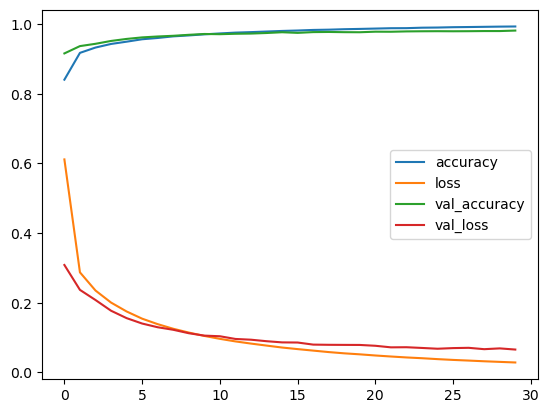

In [34]:
pd.DataFrame(history.history).plot()

In [35]:
model_clf.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9719 - loss: 0.0860


[0.07255525887012482, 0.9771000146865845]

In [36]:
X_new = X_test[:3]

In [37]:
actual = y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

<Axes: >

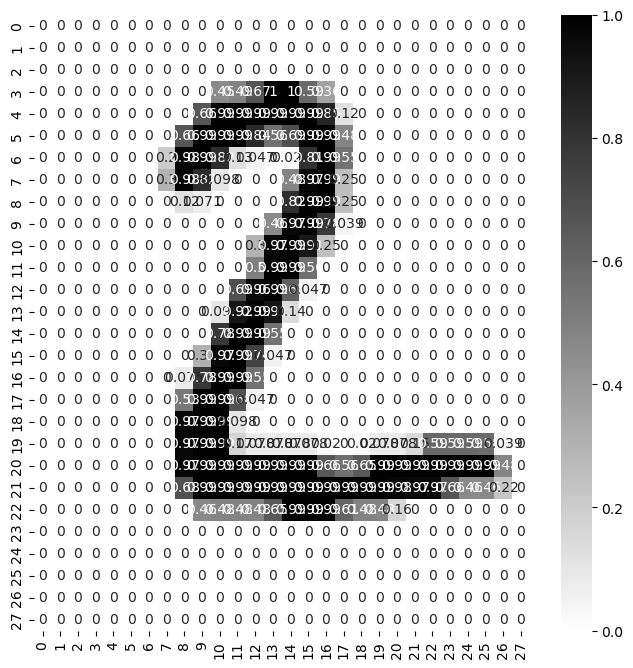

In [38]:
plt.figure(figsize=(8,8))
sns.heatmap(X_test[1],annot=True, cmap='binary')

In [39]:
y_prob = model_clf.predict(X_new)
y_prob.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [40]:
y_prob

array([[4.5175857e-06, 3.1083218e-06, 5.8628037e-05, 2.1838141e-04,
        1.0523728e-08, 2.8011229e-07, 6.3363786e-11, 9.9968863e-01,
        5.7916855e-06, 2.0718680e-05],
       [4.7370614e-07, 8.2282786e-06, 9.9991763e-01, 7.1045011e-05,
        5.7706600e-11, 1.8851607e-07, 8.7006248e-07, 1.8270722e-10,
        1.5808389e-06, 1.0897963e-11],
       [4.1970593e-06, 9.9829251e-01, 1.2874586e-04, 1.3891815e-05,
        2.6643023e-04, 1.6223112e-05, 1.0258457e-04, 5.0518411e-04,
        6.6748896e-04, 2.6992839e-06]], dtype=float32)

In [41]:
y_pred = np.argmax(y_prob,axis=-1)

In [42]:
y_pred

array([7, 2, 1], dtype=int64)

In [43]:
actual

array([7, 2, 1], dtype=uint8)

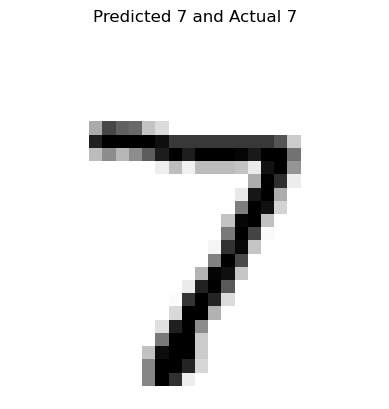

###########


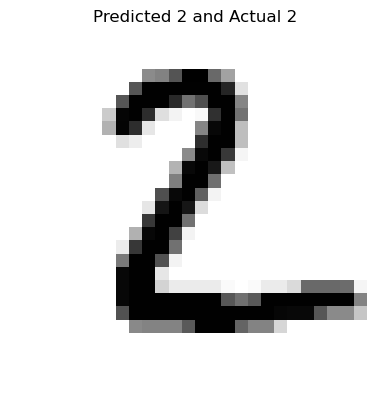

###########


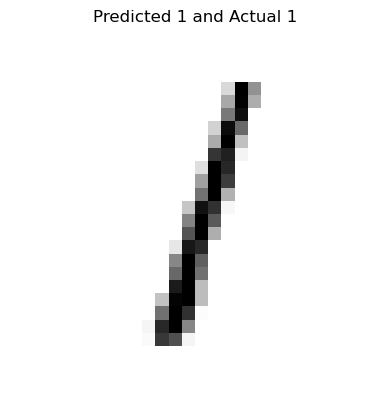

###########


In [44]:
for data, pred, actual_data in zip(X_new , y_pred , actual):
    plt.imshow(data, cmap='binary')
    plt.title(f"Predicted {pred} and Actual {actual_data}")
    plt.axis("off")
    plt.show()
    print("###########")

## Tensorboard callback Functions


In [47]:
import time 

def get_log_path(log_dir='logs/fit'):
    fileName = time.strftime('log_%Y_%m_%d_%H_%M_%S')
    logs_path = os.path.join(log_dir,fileName)
    print(f"Saving logs at {logs_path}")
    return logs_path

log_dir = get_log_path()
tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

Saving logs at logs/fit\log_2024_08_08_11_28_40


## Early Stopping Callback

In [48]:
early_stopping_cf = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

## Model Checkpointing callback

In [57]:
CKPT_path = "Model_ckpt.h5 "
checkpointing_cb = tf.keras.callbacks.ModelCheckpoint(CKPT_path, save_best_only=True)

ValueError: The filepath provided must end in `.keras` (Keras model format). Received: filepath=Model_ckpt.h5

In [58]:
# Training

EPOCHS = 4
VALIDATION_SET = (X_valid, y_valid)

history  = model_clf.fit(X_train,y_train , epochs=EPOCHS,
                        validation_data=VALIDATION_SET, batch_size=32, callbacks=[tb_cb , early_stopping_cf, checkpointing_cb])

Epoch 1/4
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9974 - loss: 0.0173 - val_accuracy: 0.9818 - val_loss: 0.0649
Epoch 2/4
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9975 - loss: 0.0166 - val_accuracy: 0.9826 - val_loss: 0.0655
Epoch 3/4
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9978 - loss: 0.0154 - val_accuracy: 0.9820 - val_loss: 0.0640
Epoch 4/4
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9977 - loss: 0.0145 - val_accuracy: 0.9810 - val_loss: 0.0648
